### Use case:
This dataset contains information of different wines composition and the preference of
the customer segment. Apply PCA Techniques and build a model; and validate too. 

In [2]:
#import libraries
import os
import pandas as pd
import numpy as np
import scipy as sp
import seaborn as sns
import math as m
import xlrd
from scipy import stats
from sklearn import datasets
import matplotlib.pyplot as plt

In [3]:
path = os.getcwd()

In [5]:
itrain = pd.read_excel(str(path)+'/Wine_dataset.xlsx')

In [35]:
itrain.apply(lambda x:(len(x.unique()), [x.unique()]))

Alcohol                 (126, [[14.23, 13.2, 13.16, 14.37, 13.24, 14.2...
Malic_Acid              (133, [[1.71, 1.78, 2.36, 1.95, 2.59, 1.76, 1....
Ash                     (79, [[2.43, 2.14, 2.67, 2.5, 2.87, 2.45, 2.61...
Ash_Alcanity            (63, [[15.6, 11.2, 18.6, 16.8, 21.0, 15.2, 14....
Magnesium               (53, [[127.0, 100.0, 101.0, 113.0, 118.0, 112....
Total_Phenols           (97, [[2.8, 2.65, 3.85, 3.27, 2.5, 2.6, 2.98, ...
Flavanoids              (132, [[3.06, 2.76, 3.24, 3.49, 2.69, 3.39, 2....
Nonflavanoid_Phenols    (39, [[0.28, 0.26, 0.3, 0.24, 0.39, 0.34, 0.31...
Proanthocyanins         (101, [[2.29, 1.28, 2.81, 2.18, 1.82, 1.97, 1....
Color_Intensity         (132, [[5.64, 4.38, 5.68, 7.8, 4.32, 6.75, 5.2...
Hue                     (78, [[1.04, 1.05, 1.03, 0.86, 1.02, 1.06, 1.0...
OD280                   (122, [[3.92, 3.4, 3.17, 3.45, 2.93, 2.85, 3.5...
Proline                 (121, [[1065.0, 1050.0, 1185.0, 1480.0, 735.0,...
Customer_Segment                      

In [36]:
print(itrain.info())
print(itrain.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
Alcohol                 178 non-null float64
Malic_Acid              178 non-null float64
Ash                     178 non-null float64
Ash_Alcanity            178 non-null float64
Magnesium               178 non-null int64
Total_Phenols           178 non-null float64
Flavanoids              178 non-null float64
Nonflavanoid_Phenols    178 non-null float64
Proanthocyanins         178 non-null float64
Color_Intensity         178 non-null float64
Hue                     178 non-null float64
OD280                   178 non-null float64
Proline                 178 non-null int64
Customer_Segment        178 non-null int64
dtypes: float64(11), int64(3)
memory usage: 19.5 KB
None
   Alcohol  Malic_Acid   Ash  Ash_Alcanity  Magnesium  Total_Phenols  \
0    14.23        1.71  2.43          15.6        127           2.80   
1    13.20        1.78  2.14          11.2        100           2.65  

In [126]:
#itrain['Customer_Segment'].value_counts().plot.bar()

In [127]:
X = itrain.drop('Customer_Segment', axis = 1)
y = itrain['Customer_Segment']

In [128]:
### Standarization:
from sklearn.preprocessing import StandardScaler
# Standardizing the features
Xstd = StandardScaler().fit_transform(X)

In [129]:
cox = np.cov(Xstd.T)
cor = X.corr()

### PCA without standarization

Text(0.5,1,'representation of classes without std')

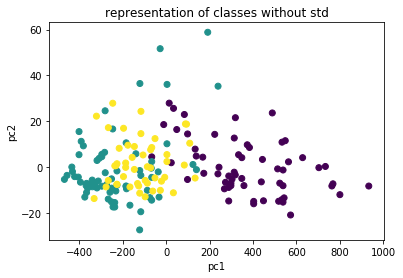

In [130]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 13)
principalComponents = pca.fit_transform(X)
pdf = pd.DataFrame(data = principalComponents, columns = X.columns)

plt.scatter(x = 'Alcohol', y = 'Malic_Acid', data = pdf, c = itrain['Customer_Segment'])
plt.xlabel('pc1')
plt.ylabel('pc2')
plt.title('representation of classes without std')

Text(0.5,1,'representation of classes wihtout std')

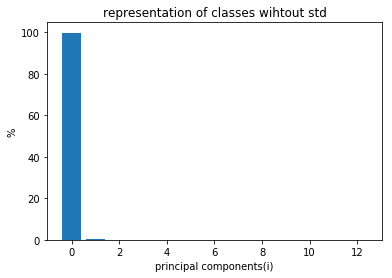

In [133]:
#The amount of variance that each PC explains
var= pca.explained_variance_ratio_

plt.bar(principalDf1.columns,var*100)
plt.xlabel('principal components(i)')
plt.ylabel('%')
plt.title('representation of classes wihtout std')

Text(0.5,1,'representation of classes std')

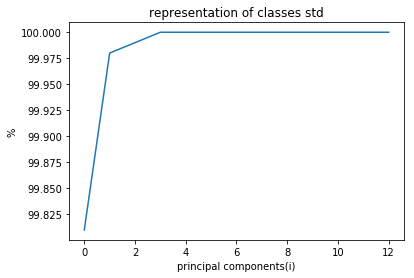

In [132]:
#Cumulative Variance explains
var1=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)

plt.plot(var1)
plt.xlabel('principal components(i)')
plt.ylabel('%')
plt.title('representation of classes std')

### PCA with Standardization

Text(0.5,1,'representation of classes with Std')

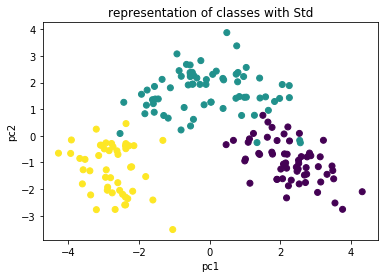

In [134]:
from sklearn.decomposition import PCA
pca1 = PCA(n_components = 13)
principalComponents1 = pca1.fit_transform(Xstd)
pdf1 = pd.DataFrame(data = principalComponents1, columns = X.columns)
plt.scatter(x = 'Alcohol', y = 'Malic_Acid', data = pdf1, c = itrain['Customer_Segment'])
plt.xlabel('pc1')
plt.ylabel('pc2')
plt.title('representation of classes with Std')

Text(0.5,1,'representation of classes wihtout std')

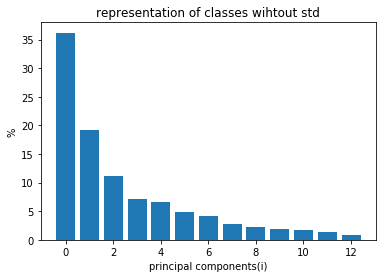

In [135]:
#The amount of variance that each PC explains
var= pca1.explained_variance_ratio_

plt.bar(principalDf1.columns,var*100)
plt.xlabel('principal components(i)')
plt.ylabel('%')
plt.title('representation of classes wihtout std')

Text(0.5,1,'representation of classes std')

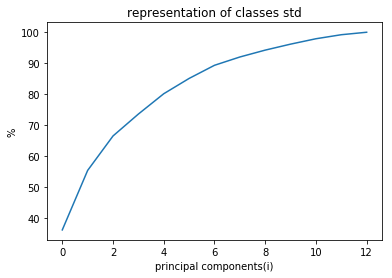

In [136]:
#Cumulative Variance explains
var1=np.cumsum(np.round(pca1.explained_variance_ratio_, decimals=4)*100)
plt.plot(var1)
plt.xlabel('principal components(i)')
plt.ylabel('%')
plt.title('representation of classes std')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f24a9b596a0>,
      dtype=object)

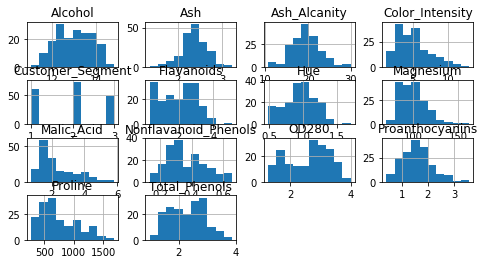

In [137]:
# Distrubution of variables is normal
itrain.hist(figsize = (8,4))